In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [19]:
df=pd.read_csv("Hackathon_Working_Data.csv")
df["UNIQUE_ID"]=df['STORECODE'].str.cat(df['BILL_ID'],sep="_")
#df.drop(["BILL_ID","STORECODE"],axis=1,inplace=True)
df.tail()

,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD,UNIQUE_ID
26980,M3,N10,31,T5999,10.0,1.0,10.0,10.0,BISCUITS - CORE & NON CORE,NON-SALT CRACKER,NON-SALT CRACKER,PARLE PRODS,PARLE KRACK JACK,PARLE KRACK JACK,N10_T5999
26981,M3,N10,31,T6007,88.0,1.0,10.0,10.0,BISCUITS - CORE & NON CORE,MARIE,MARIE,PARLE PRODS,PARLE MARIE,PARLE MARIE,N10_T6007
26982,M3,N10,31,T6007,88.0,2.0,20.0,10.0,BISCUITS - CORE & NON CORE,GLUCOSE,GLUCOSE,PARLE PRODS,PARLE-G,PARLE-G,N10_T6007
26983,M3,N10,31,T6007,88.0,1.0,58.0,58.0,CLEANERS - GLASS,LIQUIDS,LIQUIDS,RECKITT BENCKISER,COLIN,COLIN,N10_T6007
26984,M3,N10,31,T6013,15.0,1.0,15.0,15.0,BISCUITS - CORE & NON CORE,SWEET/COOKIES,SWEET/COOKIES,SAJ INDS,BISK FARM,BISK FARM JUST GINGER,N10_T6013


In [20]:
store_df = df.groupby("UNIQUE_ID").mean()[["DAY","BILL_AMT","QTY"]]

merged_df = pd.merge(df,store_df,on="UNIQUE_ID")
merged_df = merged_df.drop(["DAY_x","BILL_AMT_x"], axis=1)

In [21]:
sales_df = merged_df.groupby("UNIQUE_ID",as_index=True).mean()[["DAY_y","BILL_AMT_y"]]
sales_df['STORE'] = sales_df.index.str.split('_').str[0]

sales_df.head()

,DAY_y,BILL_AMT_y,STORE
UNIQUE_ID,,,
N10_T1038,5,34.0,N10
N10_T1039,5,46.0,N10
N10_T1040,5,86.0,N10
N10_T1043,5,20.0,N10
N10_T1048,5,180.0,N10


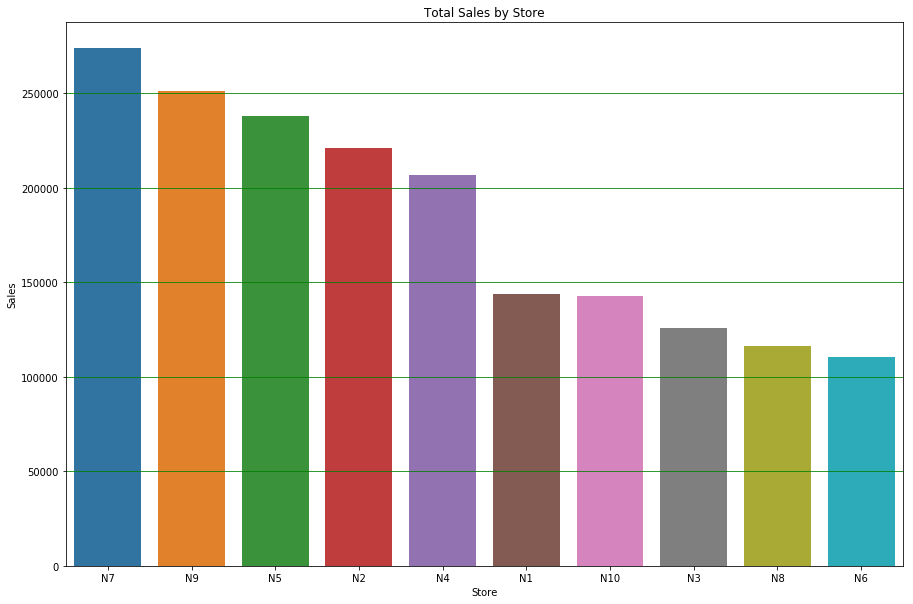

In [11]:
store_df = sales_df.groupby("STORE").sum().sort_values('BILL_AMT_y', ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(x=store_df.index,y=store_df['BILL_AMT_y'],data=store_df)
plt.title("Total Sales by Store")
plt.xlabel("Store")
plt.ylabel("Sales")
plt.grid(axis='y',color='green')

# Stores: 7,9,5 and 4 have high sales than the rest of stores in 3 months

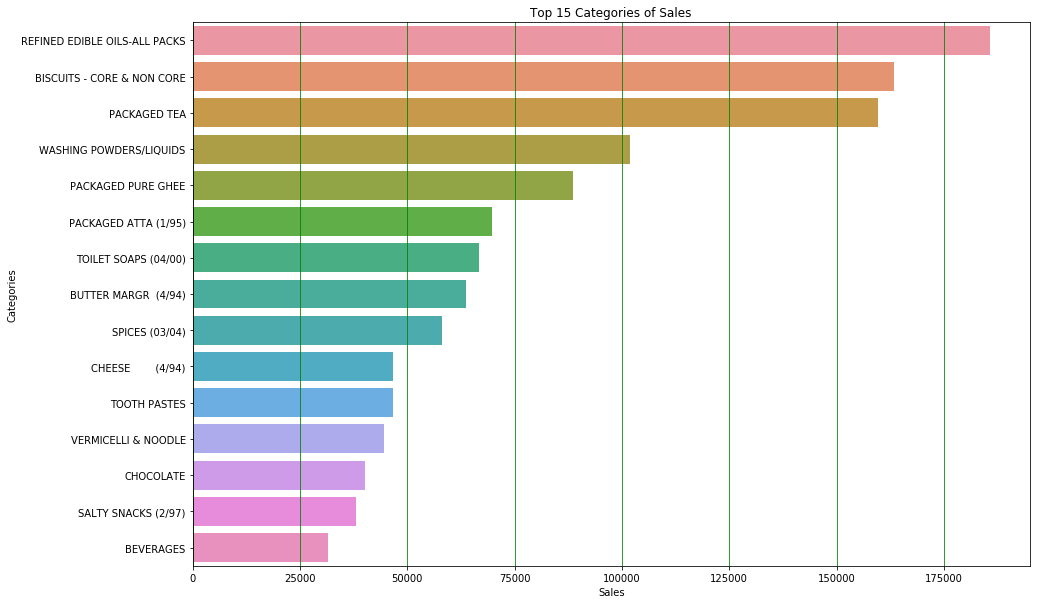

In [22]:
top_items_sales = merged_df.groupby('GRP').sum().sort_values("VALUE",ascending=False)[['QTY_x','PRICE','VALUE']][0:15]
plt.figure(figsize=(15,10))
sns.barplot(x='VALUE',y=top_items_sales.index,data=top_items_sales)
plt.title("Top 15 Categories of Sales")
plt.xlabel("Sales")
plt.ylabel("Categories")
plt.grid(axis='x',color='green');

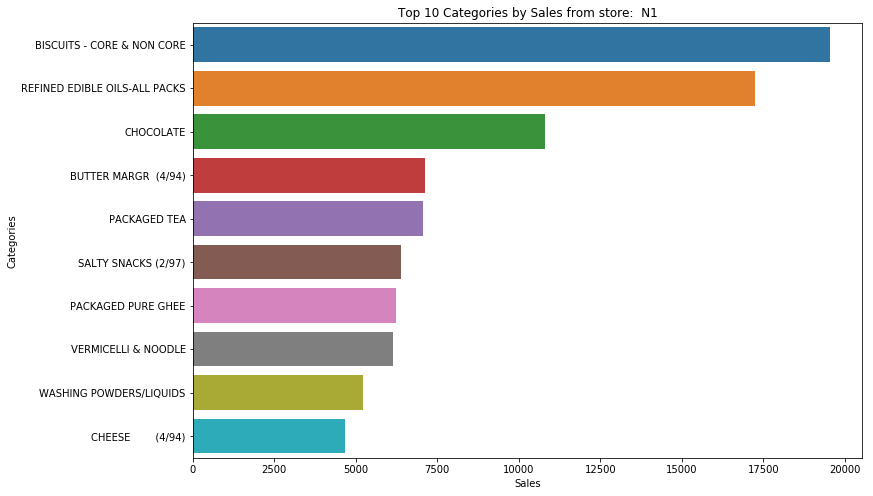

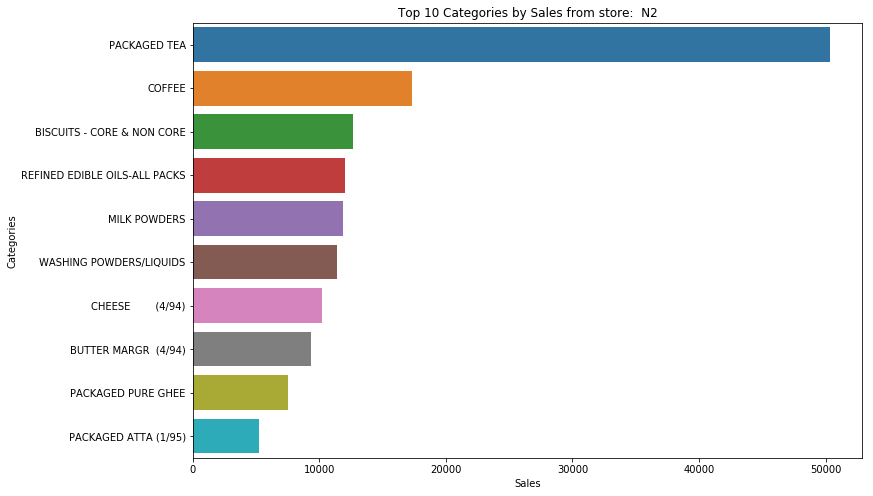

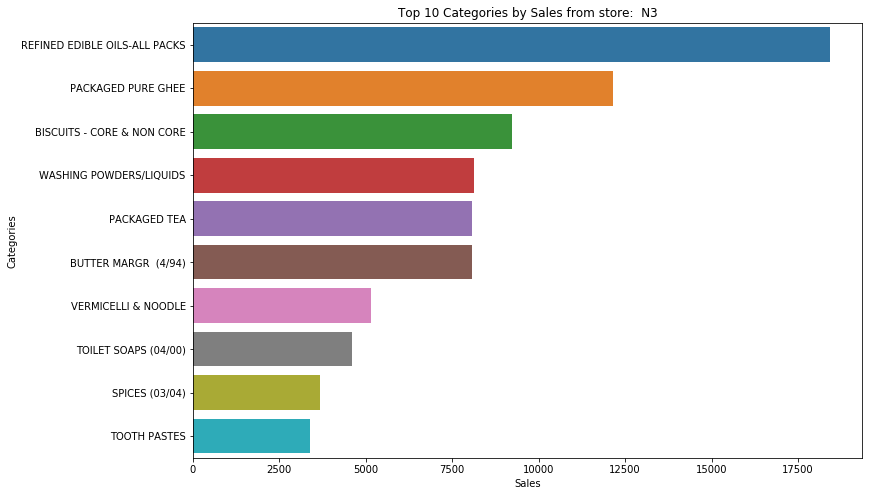

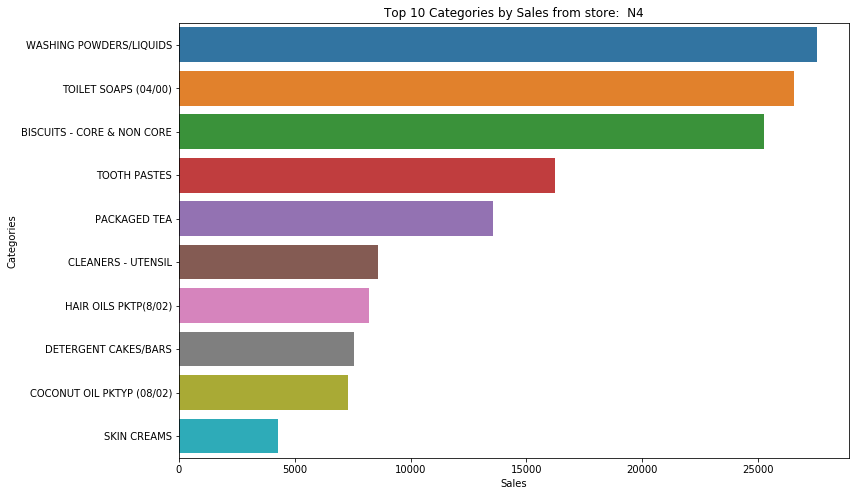

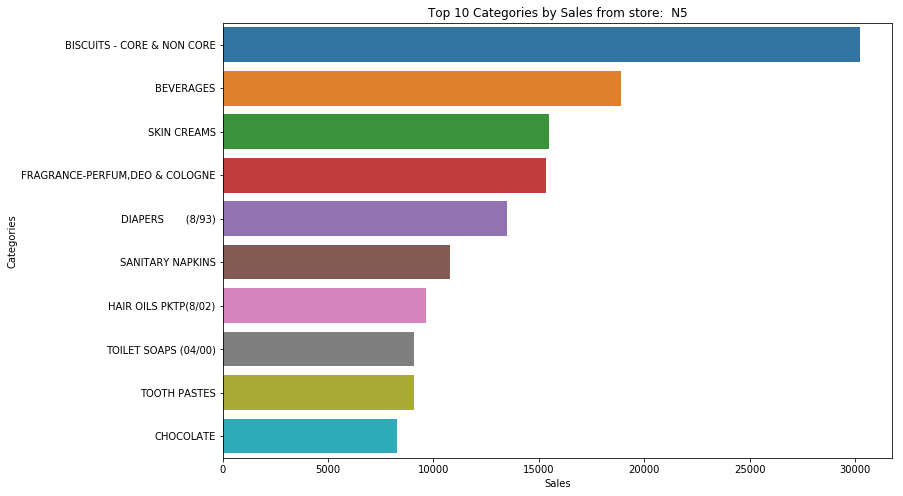

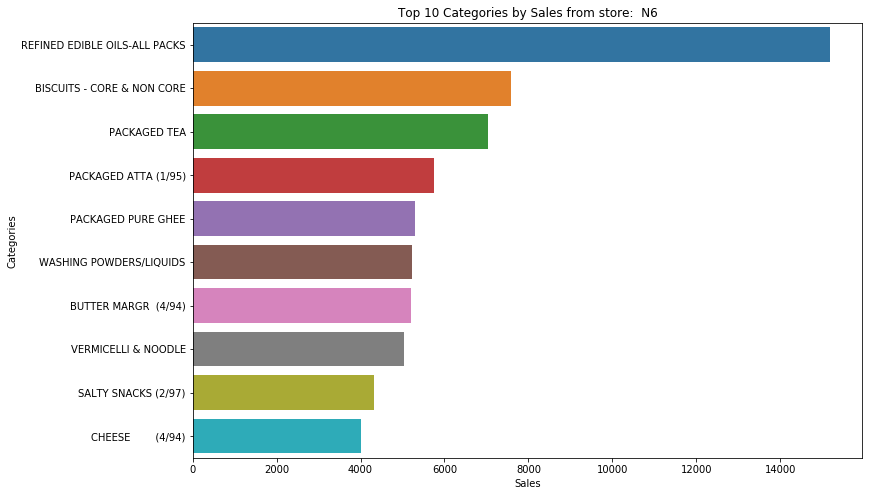

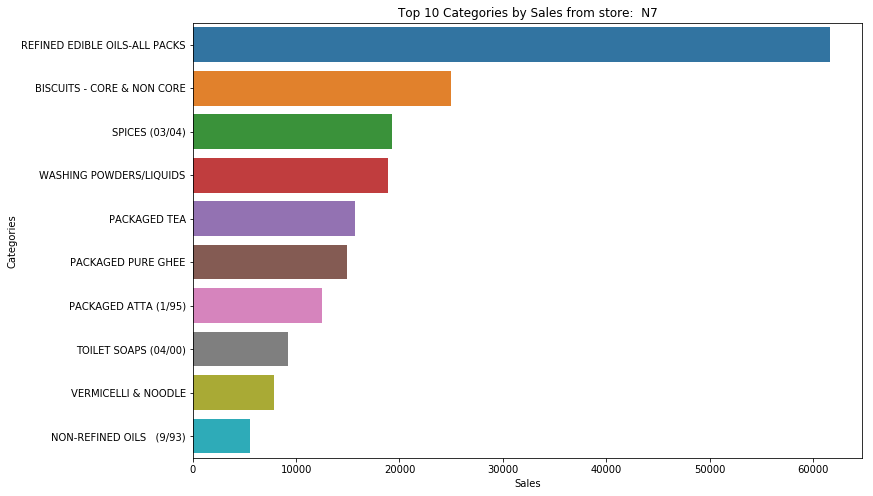

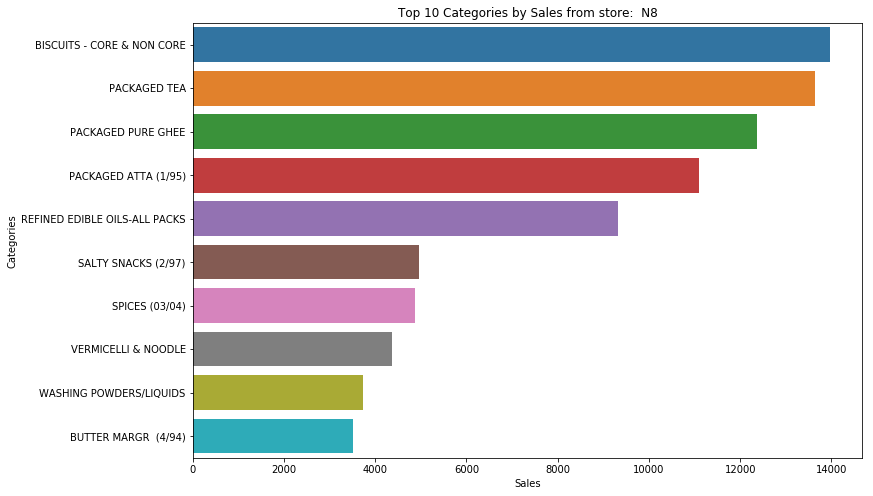

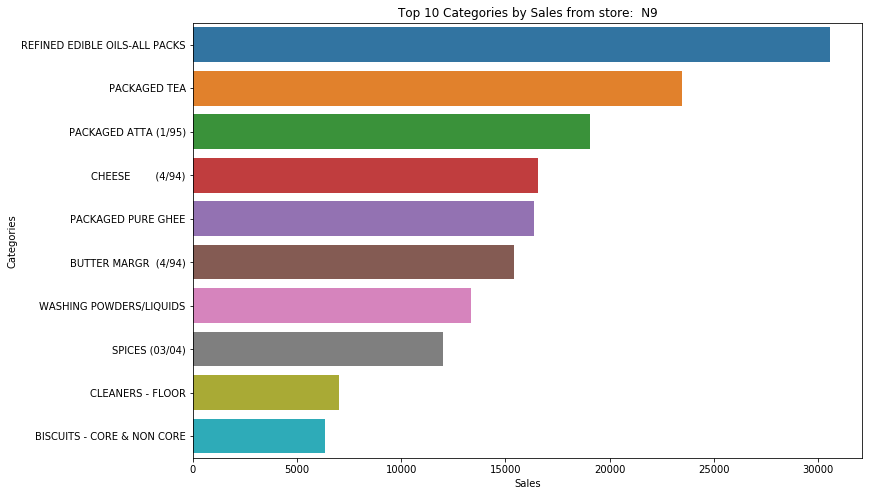

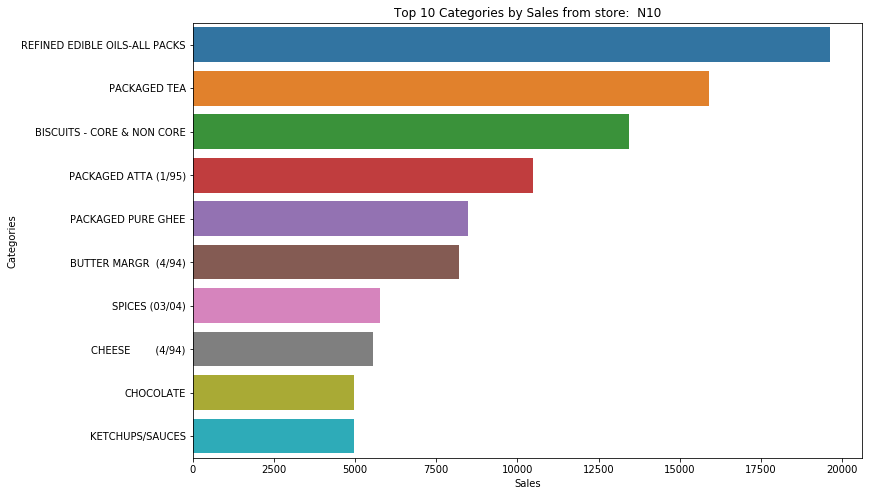

In [28]:
#Storewise Sales in 3 months and their categories
for i in merged_df.STORECODE.unique():
    x = merged_df.loc[df.STORECODE == i].groupby("GRP").sum().sort_values("VALUE",ascending=False)[["VALUE","QTY_x"]][0:10]
    plt.figure(figsize=(12,8))
    sns.barplot(x='VALUE',y=x.index,data=x)
    plt.title("Top 10 Categories by Sales from store:  " + i)
    plt.ylabel("Categories")
    plt.xlabel("Sales")

From the above figures we can clearly see that the top 10 products sold in all the stores are different.
This may be due to the location or the group of people residing nearby needs

In [34]:
merged_df.loc[df.STORECODE == "N7"].head()

,MONTH,STORECODE,BILL_ID,QTY_x,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD,UNIQUE_ID,DAY_y,BILL_AMT_y,QTY_y
5295,M1,N7,T2,1.0,106.00,106.00,REFINED EDIBLE OILS-ALL PACKS,SUN FLOWER,SUN FLOWER,CARGILL FOODS,GEMINI,GEMINI,N7_T2,1,115.75,1.0
5296,M1,N7,T2,1.0,9.75,9.75,TOOTH PASTES,TOOTH PASTES,TOOTH PASTES,COLGATE-PALMOLIVE,COLGATE DENTALCREAM,COLGATE DENTALCREAM,N7_T2,1,115.75,1.0
5297,M1,N7,T7,3.0,30.00,10.00,BISCUITS - CORE & NON CORE,CREAM,CREAM,MONDELEZ INTERNATIONAL,OREO,OREO CHOCOLATE,N7_T7,1,30.00,3.0
5298,M1,N7,T9,1.0,51.00,51.00,WASHING POWDERS/LIQUIDS,WASHING POWDERS/LIQUIDS,WASHING POWDERS/LIQUIDS,HINDUSTAN UNILEVER LIMITED,WHEEL,WHEEL GREEN,N7_T9,1,60.50,1.5
5299,M1,N7,T9,2.0,9.50,4.75,SALTY SNACKS (2/97),NUTS,NUTS,HALDIRAM,HALDIRAM,HALDIRAM SALTED PEANUTS,N7_T9,1,60.50,1.5


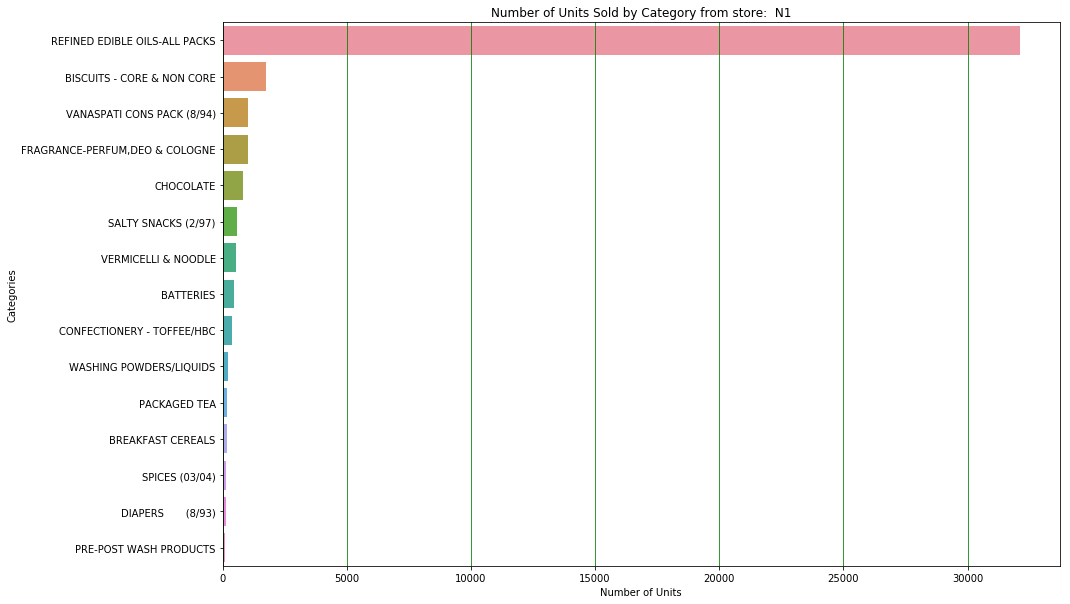

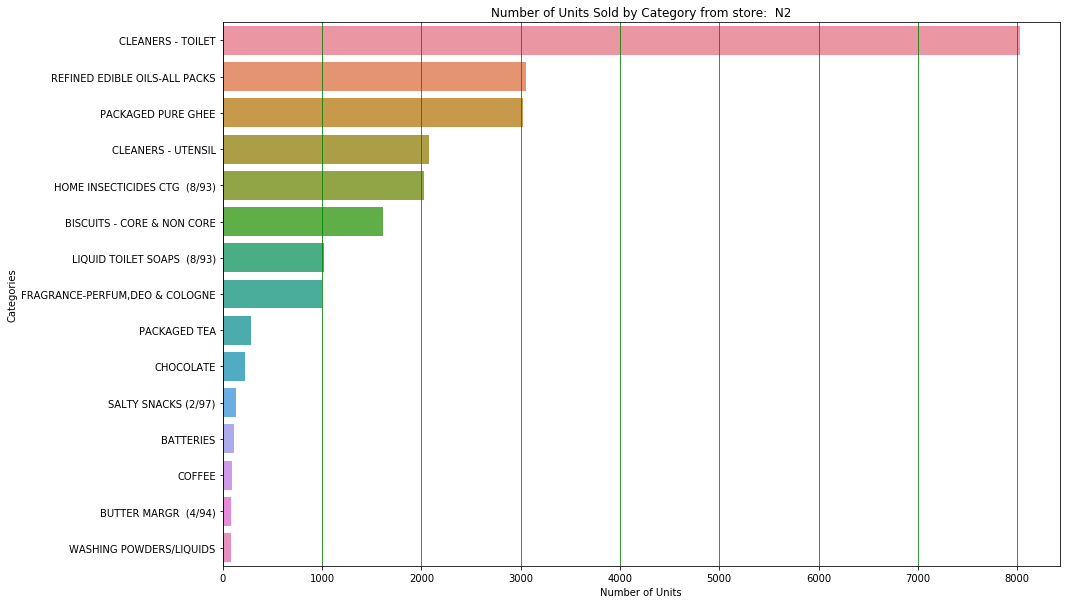

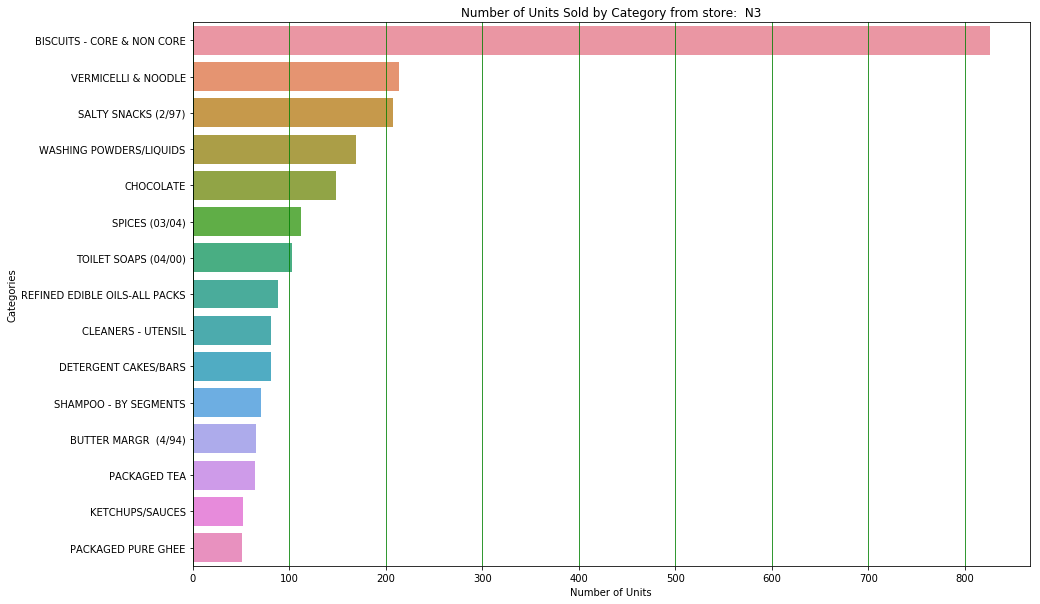

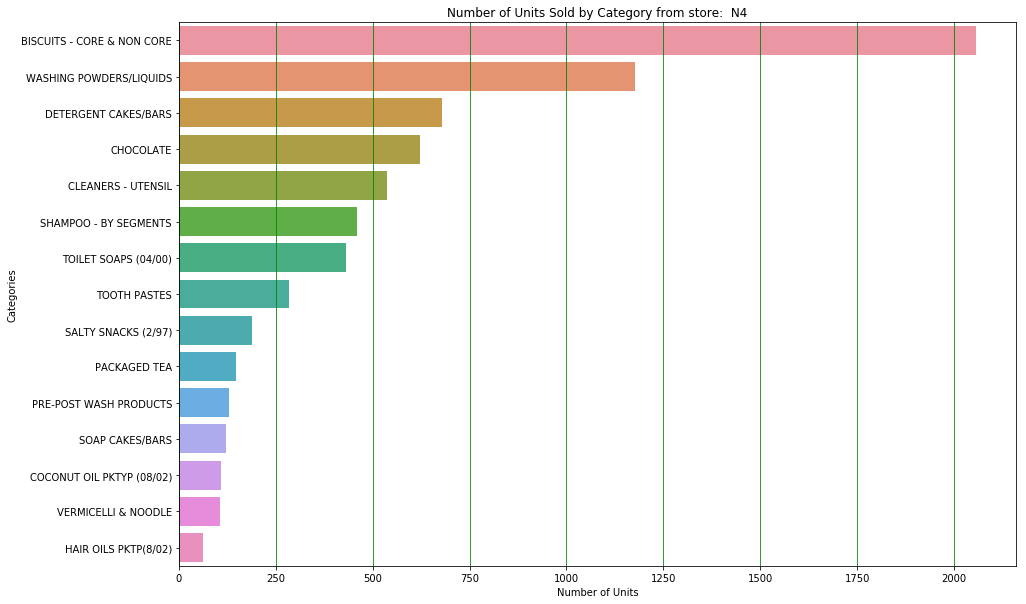

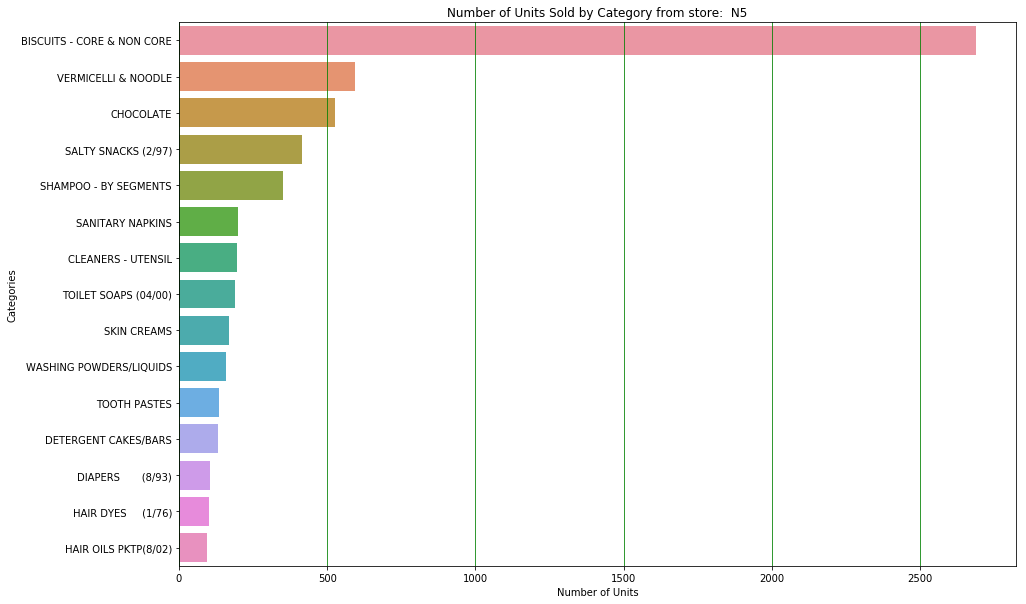

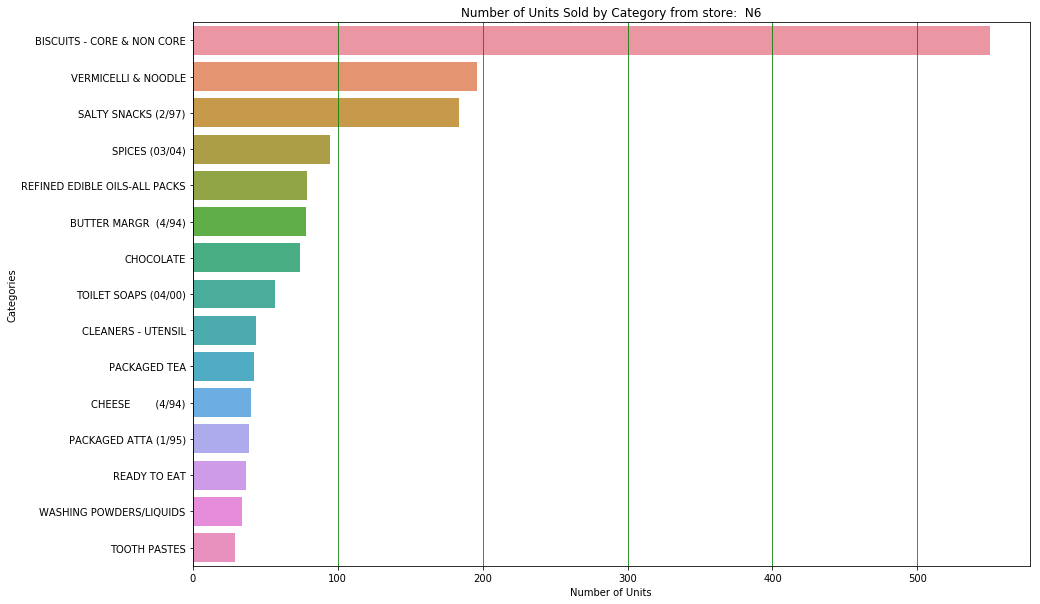

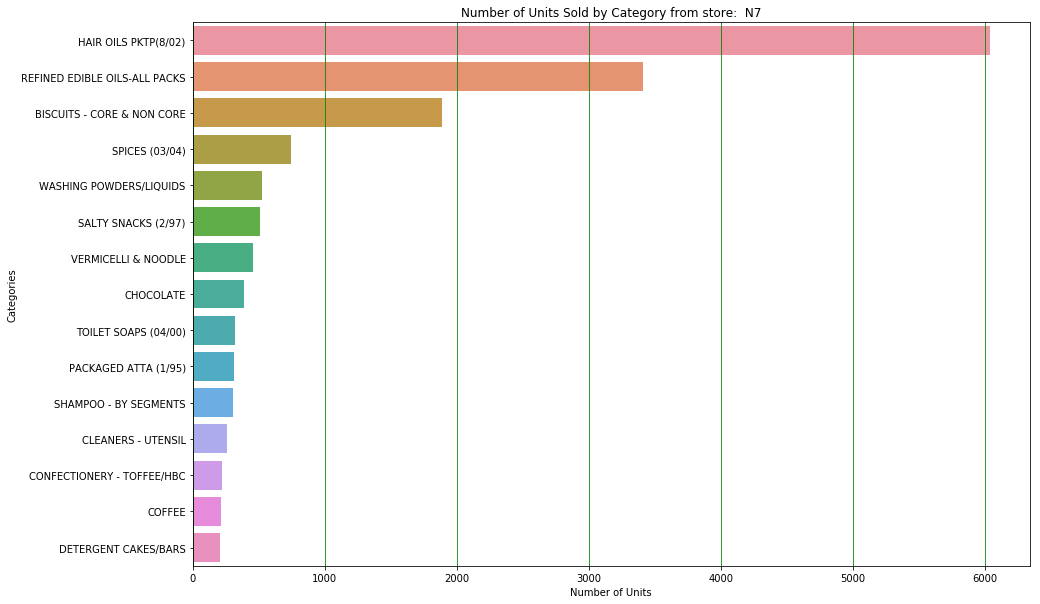

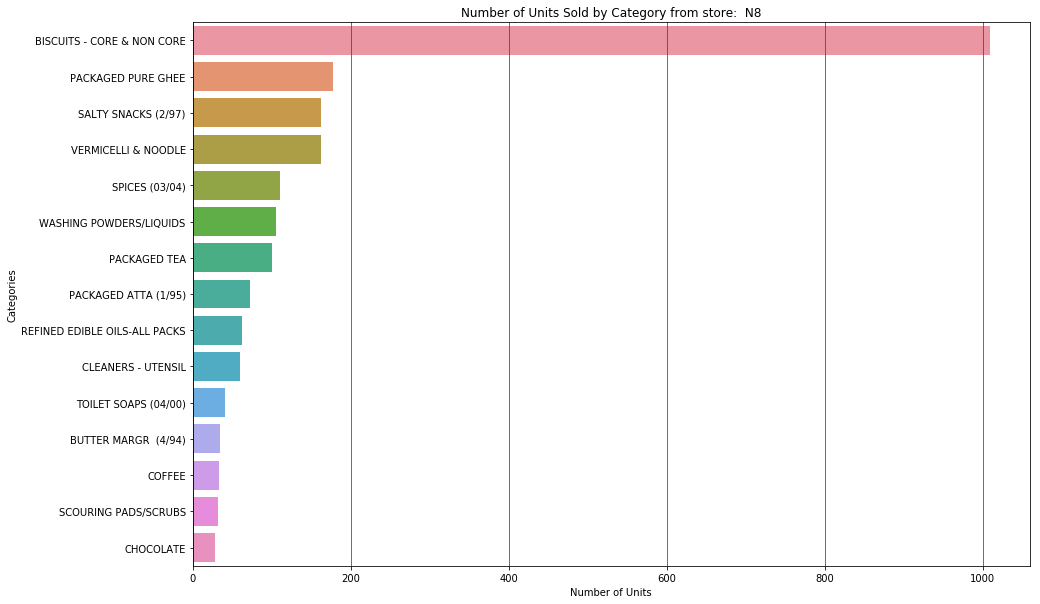

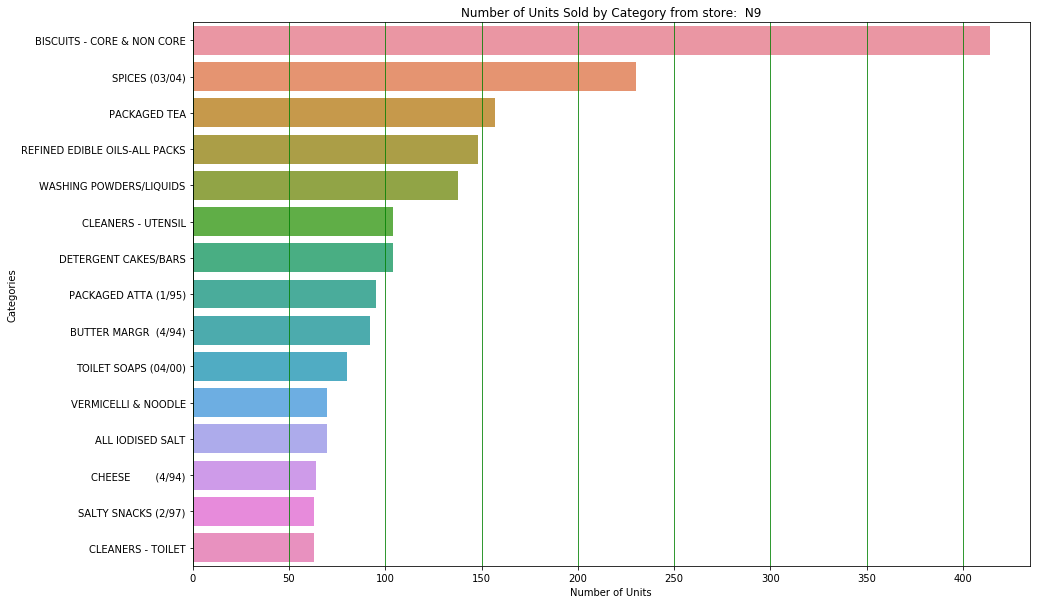

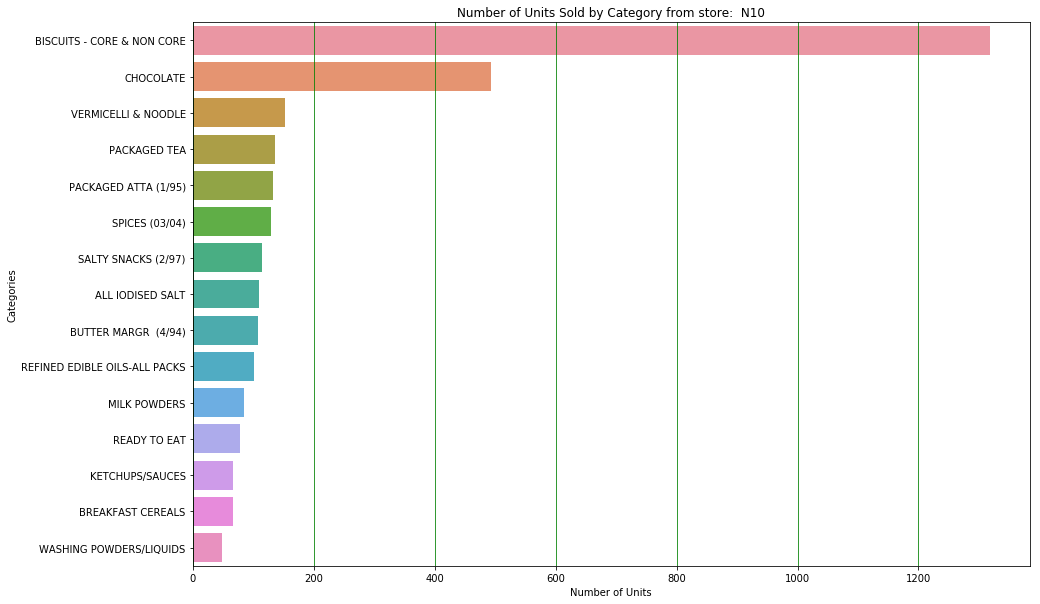

In [37]:
for i in merged_df.STORECODE.unique():
    x = merged_df.loc[df.STORECODE == i].groupby("GRP").sum().sort_values("QTY_x",ascending=False)[["VALUE","QTY_x"]][0:15]
    plt.figure(figsize=(15,10))
    sns.barplot(x='QTY_x',y=x.index,data=x)
    plt.title("Number of Units Sold by Category from store:  " + i)
    plt.xlabel("Number of Units")
    plt.ylabel("Categories")
    plt.grid(axis='x',color='green')

Based on the quantity of the products sold by each store

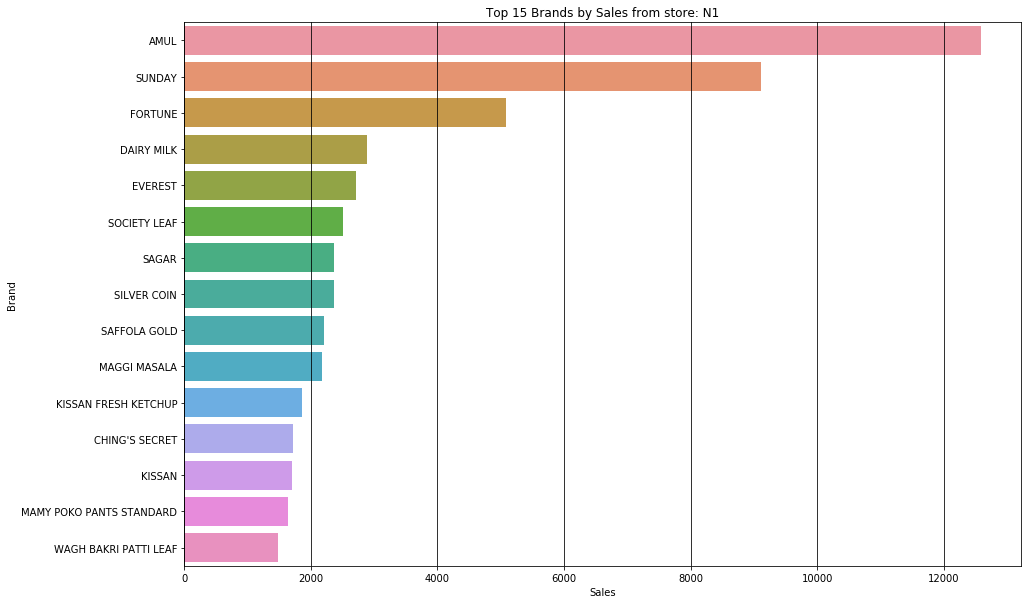

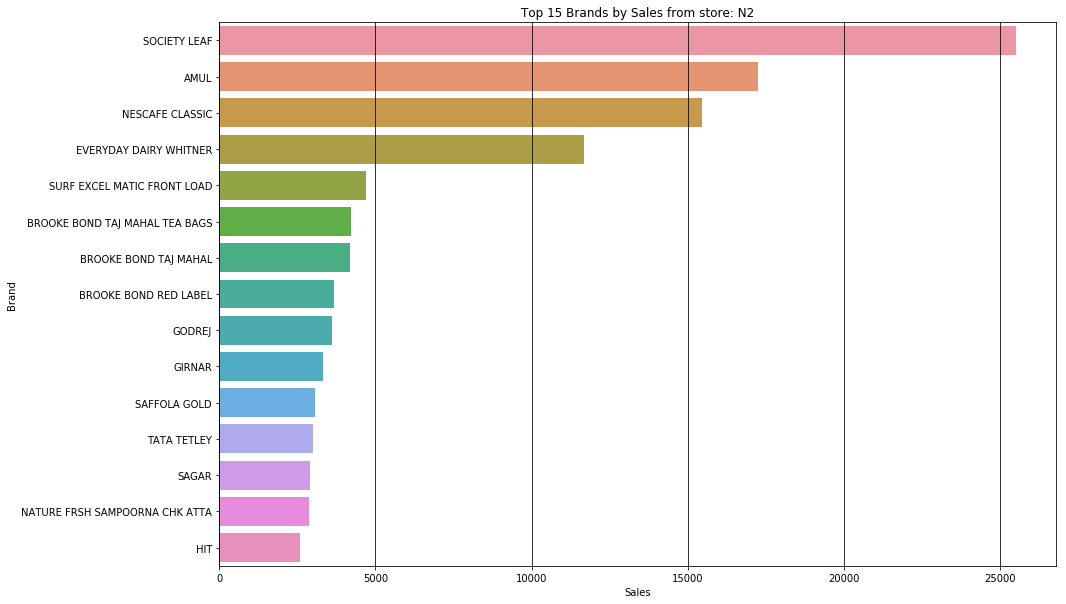

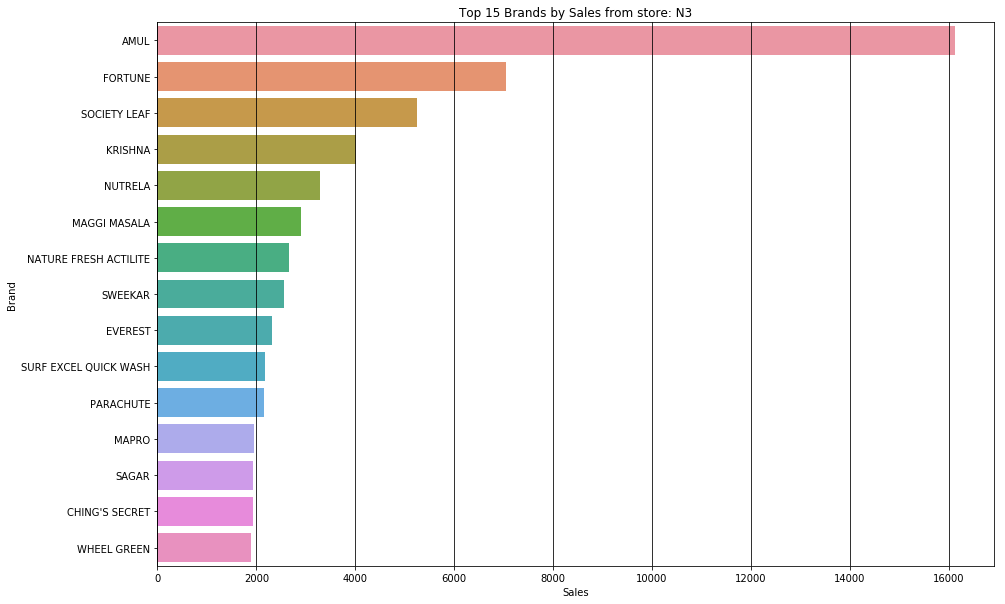

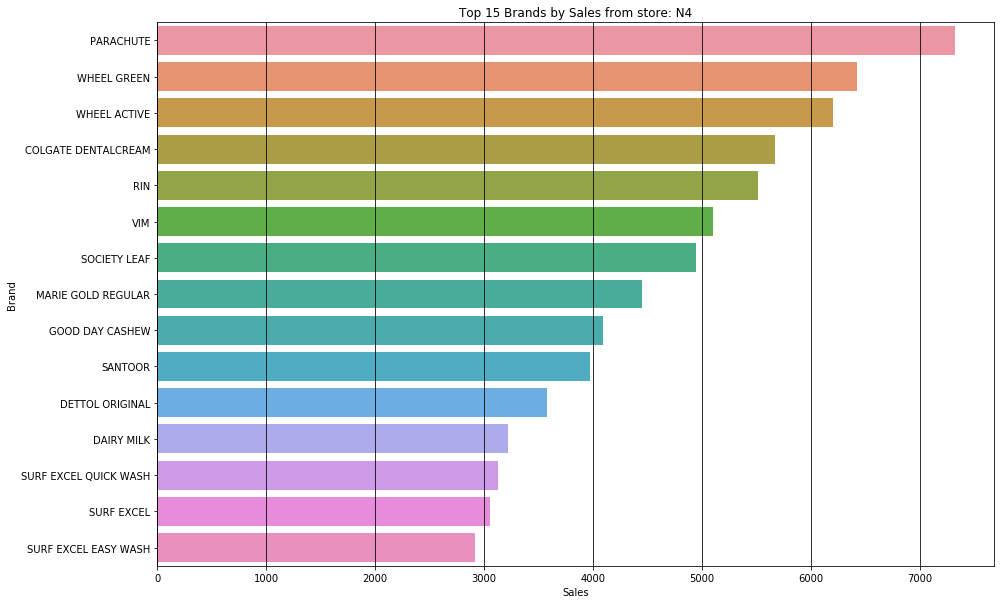

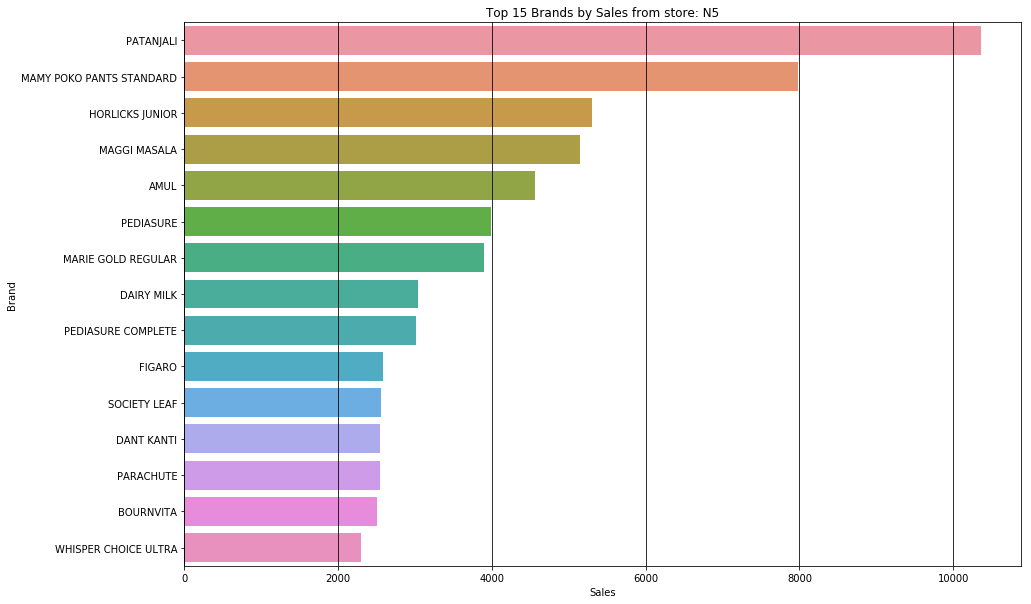

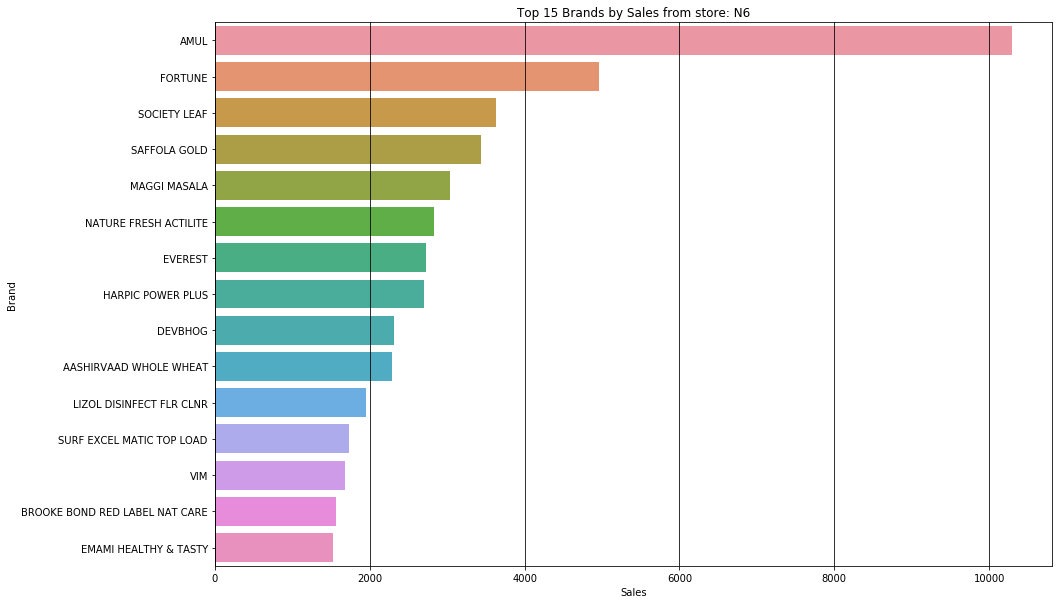

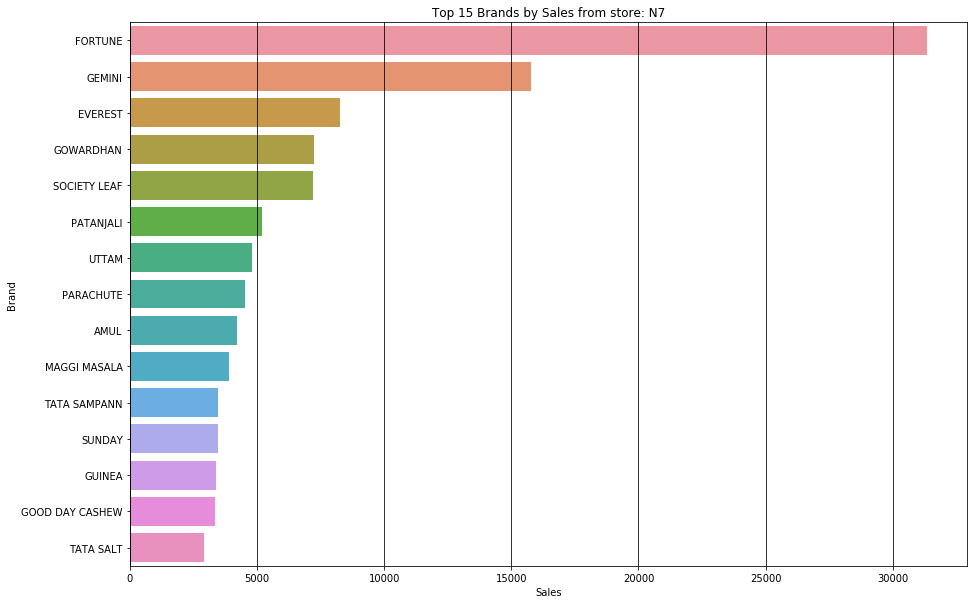

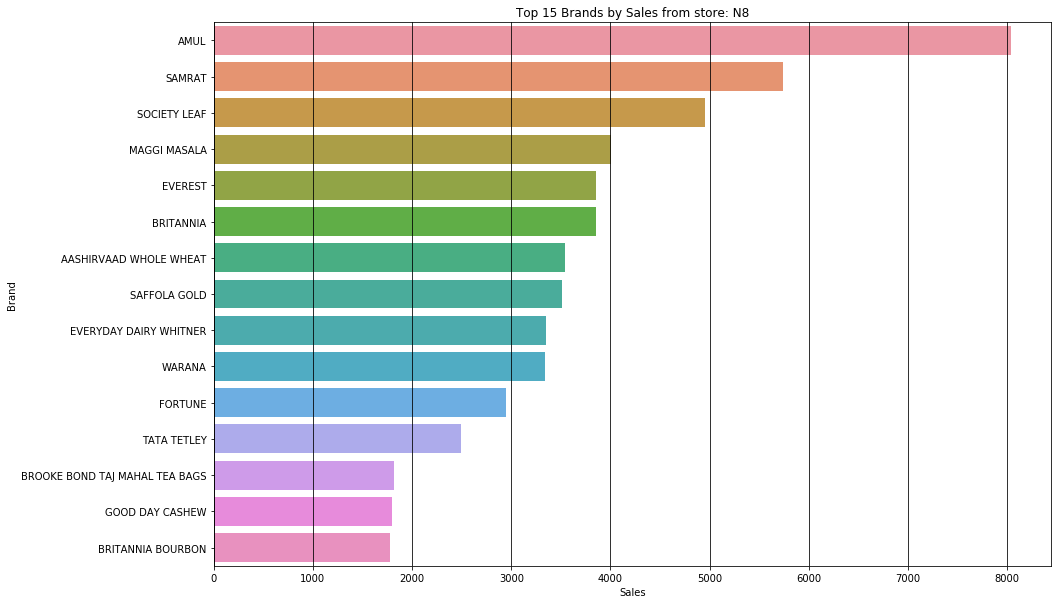

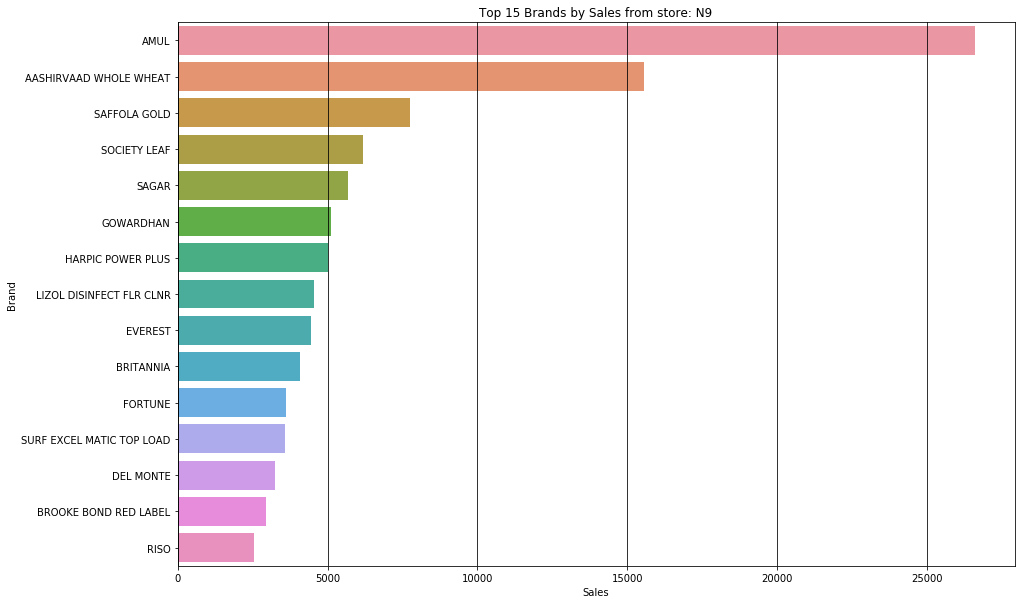

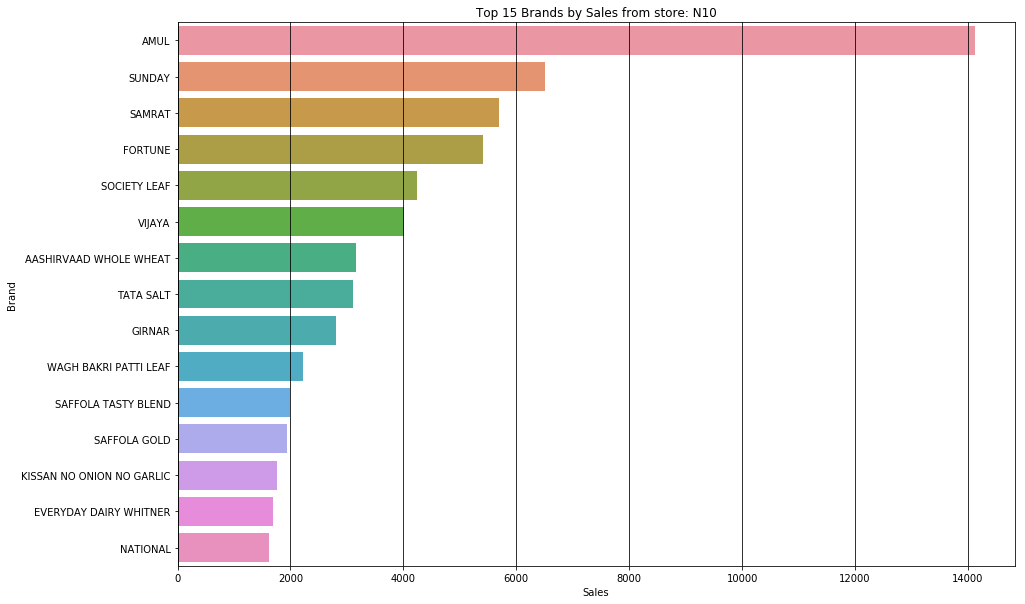

In [39]:
for i in merged_df.STORECODE.unique():
    brd_st = merged_df.loc[merged_df.STORECODE == i]
    brd = brd_st.groupby('BRD').sum().sort_values('VALUE',ascending=False)[['VALUE','QTY_x']][0:15]
    plt.figure(figsize=(15,10))
    sns.barplot(x='VALUE',y=brd.index,data=brd)
    plt.title("Top 15 Brands by Sales from store: " + i)
    plt.xlabel("Sales")
    plt.ylabel("Brand")
    plt.grid(axis='x',color='black')

# Above figures are brand analysis in each stores sold most

In [56]:
month_info = merged_df[["MONTH","UNIQUE_ID"]]
month_info["N_Month"]=month_info["MONTH"].apply(lambda x:x[1])
month_sales=pd.merge(month_info,sales_df,on="UNIQUE_ID")
month_sales = month_sales.drop('MONTH',axis=1)
month_sales['N_Month'] = pd.to_numeric(month_sales['N_Month'])
month_sales.head()

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,UNIQUE_ID,N_Month,DAY_y,BILL_AMT_y,STORE
0,N1_T375,1,4,225.0,N1
1,N1_T379,1,4,95.0,N1
2,N1_T381,1,4,10.0,N1
3,N1_T382,1,4,108.0,N1
4,N1_T384,1,4,19.0,N1


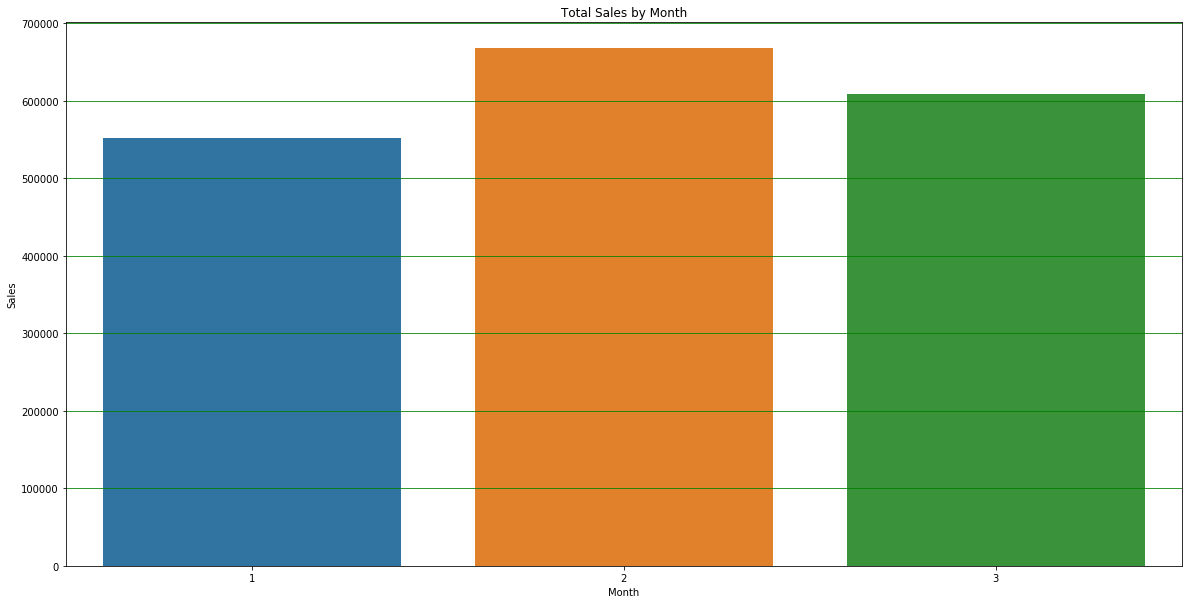

In [58]:
month_uq = month_sales.groupby('UNIQUE_ID').mean()

m_sales = month_uq.groupby('N_Month').sum()
plt.figure(figsize=(20,10))
sns.barplot(x=m_sales.index,y='BILL_AMT_y',data=m_sales)
plt.title("Total Sales by Month")
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(axis='y',color='green');

# Sales are high in the 2nd Month compared to the other months